In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import csv
import datetime
import moment

# import api key
from config import api_key
   
# Weather URL
#History weather bulk for Detroit from January 01, 2014 to December 31, 2018
weather_url = "http://history.openweathermap.org//storage/dc1e5df660e33aec203660c9b2000bc3.json"

# make request and store response
response = requests.get(weather_url)

# print status code
print(response.status_code)


200


In [2]:
#JSONify response
response_json = response.json()


In [3]:
# print first article
print(f"The first response is {json.dumps(response_json[0], indent=4)}.")

The first response is {
    "city_id": 4990729,
    "main": {
        "temp": 265.33,
        "temp_min": 263.71,
        "temp_max": 266.48,
        "pressure": 1025,
        "humidity": 61
    },
    "wind": {
        "speed": 5,
        "deg": 250
    },
    "clouds": {
        "all": 90
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04"
        }
    ],
    "dt": 1388534400,
    "dt_iso": "2014-01-01 00:00:00 +0000 UTC"
}.


In [4]:
# count of responses
print(f"We received {len(response_json)} responses.")
unixDict = {}
i = 0
for entry in response_json:
    i = i + 1
    try:
        unixDict[entry['dt']] = {
            'temp_max': entry['main']['temp_max'],
            'wind_speed': entry['wind']['speed'],
            'weather_main': entry['weather'][0]['main']
        }
    except:
        print(f'no data for {entry["dt"]}')
print(unixDict)

We received 33454 responses.
{1388534400: {'temp_max': 266.48, 'wind_speed': 5, 'weather_main': 'Clouds'}, 1388538000: {'temp_max': 265.93, 'wind_speed': 4, 'weather_main': 'Clouds'}, 1388541600: {'temp_max': 265.93, 'wind_speed': 4, 'weather_main': 'Clouds'}, 1388545200: {'temp_max': 265.37, 'wind_speed': 1, 'weather_main': 'Snow'}, 1388548800: {'temp_max': 265.37, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388552400: {'temp_max': 265.37, 'wind_speed': 0, 'weather_main': 'Snow'}, 1388556000: {'temp_max': 265.37, 'wind_speed': 0, 'weather_main': 'Snow'}, 1388559600: {'temp_max': 265.37, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388563200: {'temp_max': 265.15, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388566800: {'temp_max': 265.15, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388570400: {'temp_max': 265.15, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388574000: {'temp_max': 264.26, 'wind_speed': 4, 'weather_main': 'Snow'}, 1388577600: {'temp_max': 264.15, 'wind_speed': 1, 'weather_main'

In [5]:
# reference to CSV file
DET_csv = os.path.join("City Data","Detroit","detroit_data_fixed.csv")

with open(DET_csv, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    print(csvreader)

DET_crime_df = pd.read_csv(DET_csv)
DET_crime_df.head(100)


,Location,Offense,Date,Unix Date
0,"(42.4224, -82.986)",LARCENY: LARCENY (OTHER),01/02/2014,1388638800
1,"(42.386, -83.2736)",ESCAPE: FUGITIVE,01/03/2014,1388725200
2,"(42.4424, -83.0719)",ASSAULT: INTIMIDATION,01/04/2014,1388811600
3,"(42.3373, -83.1961)",LARCENY: LARCENY (OTHER),01/04/2014,1388811600
4,"(42.3314, -83.1239)",LARCENY: LARCENY (OTHER),01/06/2014,1388984400
5,"(42.419, -83.14200000000001)",FRAUD: FRAUD (OTHER),01/07/2014,1389070800
6,"(42.3981, -83.2259)",FRAUD: FRAUD (OTHER),01/08/2014,1389157200
7,"(42.4353, -83.2304)",ASSAULT: INTIMIDATION,01/09/2014,1389243600
8,"(42.4283, -82.9941)",FRAUD: FRAUD (OTHER),01/09/2014,1389243600
9,"(42.4042, -83.1461)",FRAUD: FRAUD (OTHER),01/09/2014,1389243600


In [6]:
DET_crime_df["Temp_Max"] = ""
DET_crime_df["Wind_Speed"] = ""
DET_crime_df["Weather_Type"] = ""
DET_crime_df.head()

,Location,Offense,Date,Unix Date,Temp_Max,Wind_Speed,Weather_Type
0,"(42.4224, -82.986)",LARCENY: LARCENY (OTHER),01/02/2014,1388638800,,,
1,"(42.386, -83.2736)",ESCAPE: FUGITIVE,01/03/2014,1388725200,,,
2,"(42.4424, -83.0719)",ASSAULT: INTIMIDATION,01/04/2014,1388811600,,,
3,"(42.3373, -83.1961)",LARCENY: LARCENY (OTHER),01/04/2014,1388811600,,,
4,"(42.3314, -83.1239)",LARCENY: LARCENY (OTHER),01/06/2014,1388984400,,,


In [7]:
# create a params dict that will be updated with weather data each iteration
params = {"key": api_key}
weather_url = "http://history.openweathermap.org//storage/dc1e5df660e33aec203660c9b2000bc3.json"


In [8]:
# Use unix date to identify weather

def getWeather(t,val):
    #print(t['Unix Date'])
    try:
        return unixDict[t['Unix Date']][val]
    except:
        return 'N/A'

DET_crime_df['Temp_Max'] = DET_crime_df.apply(lambda row: getWeather(row,'temp_max'),axis=1)
DET_crime_df['Wind_Speed'] = DET_crime_df.apply(lambda row: getWeather(row, 'wind_speed'),axis=1)
DET_crime_df['Weather_Type'] = DET_crime_df.apply(lambda row: getWeather(row, 'weather_main'),axis=1)


In [9]:
weather_df = DET_crime_df.loc[DET_crime_df['Temp_Max'] != 'N/A']
weather_df.head(100)

,Location,Offense,Date,Unix Date,Temp_Max,Wind_Speed,Weather_Type
0,"(42.4224, -82.986)",LARCENY: LARCENY (OTHER),01/02/2014,1388638800,284.618,4,Clouds
1,"(42.386, -83.2736)",ESCAPE: FUGITIVE,01/03/2014,1388725200,259.15,5,Clouds
2,"(42.4424, -83.0719)",ASSAULT: INTIMIDATION,01/04/2014,1388811600,263.15,1,Haze
3,"(42.3373, -83.1961)",LARCENY: LARCENY (OTHER),01/04/2014,1388811600,263.15,1,Haze
4,"(42.3314, -83.1239)",LARCENY: LARCENY (OTHER),01/06/2014,1388984400,270.15,4,Rain
5,"(42.419, -83.14200000000001)",FRAUD: FRAUD (OTHER),01/07/2014,1389070800,284.618,4,Clouds
6,"(42.3981, -83.2259)",FRAUD: FRAUD (OTHER),01/08/2014,1389157200,257.04,2,Clouds
7,"(42.4353, -83.2304)",ASSAULT: INTIMIDATION,01/09/2014,1389243600,260.15,4,Clouds
8,"(42.4283, -82.9941)",FRAUD: FRAUD (OTHER),01/09/2014,1389243600,260.15,4,Clouds
9,"(42.4042, -83.1461)",FRAUD: FRAUD (OTHER),01/09/2014,1389243600,260.15,4,Clouds


In [10]:
#new data frame with split value columns 
new_weather_df = weather_df["Offense"].str.split(":", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
weather_df["Offense Main"]= new_weather_df[0] 
  
# making seperate last name column from new data frame 
weather_df["Offense Sub"]= new_weather_df[1] 
  
# Dropping old Name columns 
weather_df.drop(columns =["Offense"], inplace = True) 
  
# df display 
weather_df.head(100)

C:\Users\ryanb\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ryanb\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ryanb\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

,Location,Date,Unix Date,Temp_Max,Wind_Speed,Weather_Type,Offense Main,Offense Sub
0,"(42.4224, -82.986)",01/02/2014,1388638800,284.618,4,Clouds,LARCENY,LARCENY (OTHER)
1,"(42.386, -83.2736)",01/03/2014,1388725200,259.15,5,Clouds,ESCAPE,FUGITIVE
2,"(42.4424, -83.0719)",01/04/2014,1388811600,263.15,1,Haze,ASSAULT,INTIMIDATION
3,"(42.3373, -83.1961)",01/04/2014,1388811600,263.15,1,Haze,LARCENY,LARCENY (OTHER)
4,"(42.3314, -83.1239)",01/06/2014,1388984400,270.15,4,Rain,LARCENY,LARCENY (OTHER)
5,"(42.419, -83.14200000000001)",01/07/2014,1389070800,284.618,4,Clouds,FRAUD,FRAUD (OTHER)
6,"(42.3981, -83.2259)",01/08/2014,1389157200,257.04,2,Clouds,FRAUD,FRAUD (OTHER)
7,"(42.4353, -83.2304)",01/09/2014,1389243600,260.15,4,Clouds,ASSAULT,INTIMIDATION
8,"(42.4283, -82.9941)",01/09/2014,1389243600,260.15,4,Clouds,FRAUD,FRAUD (OTHER)
9,"(42.4042, -83.1461)",01/09/2014,1389243600,260.15,4,Clouds,FRAUD,FRAUD (OTHER)


In [11]:
#convert temp from Kelvins to Farenheit
weather_df["Temp_Max_Fahrenheit"] = (weather_df["Temp_Max"] - 273.15) * 9/5 + 32
weather_df.head()



C:\Users\ryanb\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Location,Date,Unix Date,Temp_Max,Wind_Speed,Weather_Type,Offense Main,Offense Sub,Temp_Max_Fahrenheit
0,"(42.4224, -82.986)",01/02/2014,1388638800,284.618,4,Clouds,LARCENY,LARCENY (OTHER),52.6424
1,"(42.386, -83.2736)",01/03/2014,1388725200,259.15,5,Clouds,ESCAPE,FUGITIVE,6.8
2,"(42.4424, -83.0719)",01/04/2014,1388811600,263.15,1,Haze,ASSAULT,INTIMIDATION,14
3,"(42.3373, -83.1961)",01/04/2014,1388811600,263.15,1,Haze,LARCENY,LARCENY (OTHER),14
4,"(42.3314, -83.1239)",01/06/2014,1388984400,270.15,4,Rain,LARCENY,LARCENY (OTHER),26.6


In [12]:
maker_group = weather_df.groupby('Offense Main')

# Count how many times each maker appears in our group
count_makers = maker_group['Offense Main'].count()

count_makers


Offense Main
AGGRAVATED ASSAULT         8789
ARSON                       818
ASSAULT                   17572
BRIBERY                       3
BURGLARY                   9841
CIVIL                        19
DAMAGE TO PROPERTY        10265
DANGEROUS DRUGS            3327
DISORDERLY CONDUCT          775
DRUNKENNESS                   3
EMBEZZLEMENT                 48
ENVIRONMENT                 109
ESCAPE                     1400
EXTORTION                   156
FAMILY OFFENSE              324
FORGERY                     192
FRAUD                      5645
GAMBLING                      5
HOMICIDE                    282
IMMIGRATION                  10
JUSTIFIABLE HOMICIDE         11
KIDNAPING                   204
LARCENY                   15272
LIQUOR                       66
MISCELLANEOUS             30471
MISCELLANEOUS ARREST          5
MURDER/INFORMATION            5
NEGLIGENT HOMICIDE           10
OBSCENITY                     6
OBSTRUCTING JUDICIARY      1716
OBSTRUCTING THE POLICE     

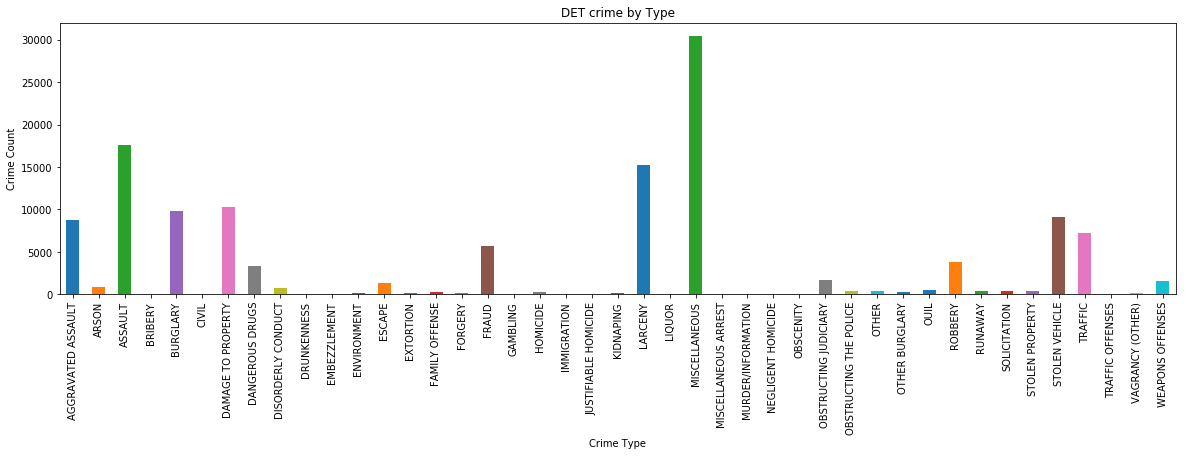

In [13]:
count_chart = count_makers.plot(kind='bar',figsize=(20,5))
count_chart.set_xlabel("Crime Type")
count_chart.set_ylabel("Crime Count")
plt.title("DET crime by Type")
plt.show()


In [14]:
maker_group_date = weather_df.groupby('Weather_Type')

# Count how many times each maker appears in our group
count_makers_date = maker_group_date['Weather_Type'].count()

count_makers_date

Weather_Type
Clear           55371
Clouds          37737
Drizzle           359
Fog              1657
Haze             3848
Mist            10859
Rain            18685
Smoke             359
Snow             2831
Thunderstorm      347
Name: Weather_Type, dtype: int64

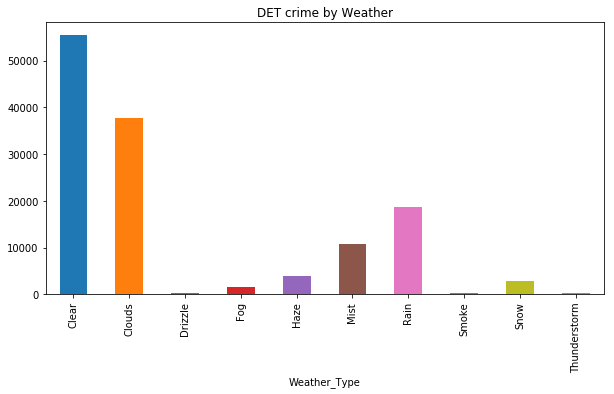

In [15]:
count_chart_2 = count_makers_date.plot(kind='bar',figsize=(10,5))
count_chart.set_xlabel("Weather Type")
count_chart.set_ylabel("Weather Count")
plt.title("DET crime by Weather")
plt.show()

In [16]:
maker_group_2 = weather_df.groupby('Unix Date')

# Count how many times each maker appears in our group
count_makers_2 = maker_group_2['Unix Date'].count()

count_makers_2

Unix Date
1388552400    456
1388638800    261
1388725200    313
1388811600    328
1388898000    241
1388984400    253
1389070800    246
1389157200    289
1389243600    294
1389330000    385
1389416400    342
1389502800    320
1389589200    396
1389675600    356
1389762000    418
1389848400    352
1389934800    386
1390021200    293
1390107600    282
1390194000    343
1390280400    348
1390366800    333
1390453200    372
1390626000    285
1390712400    257
1390798800    319
1390885200    324
1390971600    331
1391058000    342
1391144400    372
             ... 
1448082000    298
1448168400    285
1448254800    311
1448341200    350
1448427600    387
1448600400    313
1448686800    341
1448773200    322
1449118800    401
1449205200    435
1449291600    424
1449378000    343
1449464400    364
1449550800    382
1449896400    388
1449982800    396
1450069200    389
1450155600    427
1450242000    379
1450414800    412
1450501200    343
1450587600    318
1450674000    308
1450760400    325


In [17]:
wind_group_5 = weather_df.groupby('Wind_Speed')

# Count how many times each maker appears in our group
count_wind_5 = wind_group_5['Wind_Speed'].count()

count_wind_5.sort_values(ascending=False, na_position='first')
                         
print(wind_group_5)

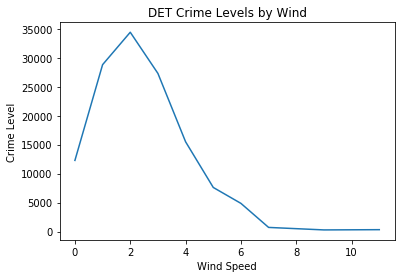

In [18]:
wind_chart_5 = count_wind_5.plot.line()
wind_chart_5.set_xlabel("Wind Speed")
wind_chart_5.set_ylabel("Crime Level")
plt.title("DET Crime Levels by Wind")
# Sets the x limits of the current chart
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()

In [19]:
temp_group_5 = weather_df.groupby('Temp_Max_Fahrenheit')

# Count how many times each maker appears in our group
count_temp_5 = temp_group_5['Temp_Max_Fahrenheit'].count()

count_temp_5.sort_values(ascending=False, na_position='first')
                         
print(temp_group_5)

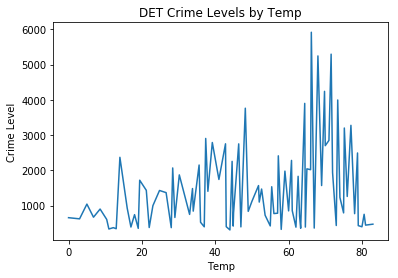

In [20]:
temp_chart_5 = count_temp_5.plot.line()
temp_chart_5.set_xlabel("Temp")
temp_chart_5.set_ylabel("Crime Level")
plt.title("DET Crime Levels by Temp")
# Sets the x limits of the current chart
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()